## Import required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the dataset

In [2]:
dataset = pd.read_excel('Win_Prediction_Data.xlsx')
dataset.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [3]:
df = dataset.copy()
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [4]:
# Check the number of rows and columns
df.shape

(10061, 9)

In [5]:
# Basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [6]:
# Data Pre-processing:
# 1. Missing Values
# 2. Outlier
# 3. Feature Encoding- Label encoder, One Hot Encoder, dummy variable
# 4. Feature Scaling- Normalization , Standardization
# 5. Removing non-significant variables
# 6. Imbalaced Data-only for classification
# 7. Remove duplicates- Data Cleaning

## Missing Values Check

In [7]:
# Check the missing values
df.isnull().sum()

# Observation: There are some missing values in the 'Client Category'

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

<AxesSubplot:>

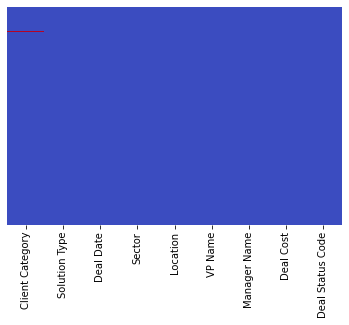

In [8]:
# Doing the visualization for missing values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm' )

In [9]:
# Handling the missing values in the column 'Client Category'
Client_Category = df['Client Category'].value_counts()
Client_Category

Others                   1763
Internal                 1454
Services_based           1202
Tech                      913
Domestic Public Bank      419
International Bank        376
Consulting                352
Finance                   339
Telecom                   327
Power ind                 264
Domestic Private Bank     262
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            152
Domestic Bank             134
Retail_market             126
Govt                      121
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [10]:
df['Client Category'] = df['Client Category'].fillna('Others')

<AxesSubplot:>

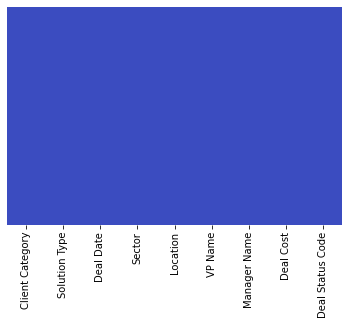

In [11]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm' )

## Summary of Categorical Variables

In [12]:
sumcat = df.describe(include=['O'])

In [13]:
sumcat

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Status Code
count,10061,10061,10061,10061,10061,10061,10061
unique,41,67,25,13,43,278,2
top,Others,Solution 32,Sector 23,L10,Mervin Harwood,Molly Eakes,Lost
freq,1842,1439,2693,3360,1166,323,6306


In [14]:
# Finding the index of the 'Client Category'
Client_Category_index = df['Client Category'].value_counts().index
Client_Category_index

Index(['Others', 'Internal', 'Services_based', 'Tech', 'Domestic Public Bank',
       'International Bank', 'Consulting', 'Finance', 'Telecom', 'Power ind',
       'Domestic Private Bank', 'Insurance', 'Consumer Good', 'Automobiles',
       'Infrastructure', 'Domestic Bank', 'Retail_market', 'Govt',
       'Hospitality', 'Manufacturing', 'Pharma', 'Healthcare', 'Electronics',
       'Media_Journal', 'Industries', 'Research Development', 'Energy',
       'Knowledge', 'Management', 'Govt Bank Special', 'Payment', 'Energy ',
       'e-commerce', 'Airpline', 'Holding', 'International Org', 'Logistics',
       'Real Estate', 'Share_market', 'Tax_audit', 'Medical '],
      dtype='object')

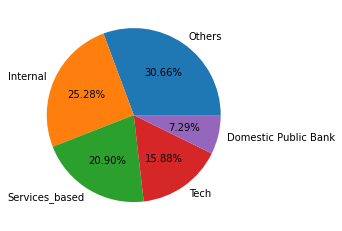

In [15]:
# Visualize the different Client_Category using pie chart for top 5 Client_Category
plt.pie(Client_Category[:5], labels= Client_Category_index[:5], autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

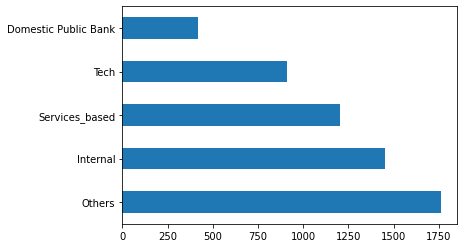

In [16]:
# Checking the Client_Category using bar chart
Client_Category[:5].plot(kind = 'barh')

In [17]:
# 'Solution Type'
Solution_Type = df['Solution Type'].value_counts()

In [18]:
Solution_Type

Solution 32    1439
Solution 9     1418
Solution 10    1016
Solution 39     585
Solution 67     584
               ... 
Solution 60       1
Solution 57       1
Solution 56       1
Solution 18       1
Solution 19       1
Name: Solution Type, Length: 67, dtype: int64

In [19]:
Solution_Type_index = df['Solution Type'].value_counts().index

In [20]:
Solution_Type_index

Index(['Solution 32', 'Solution 9', 'Solution 10', 'Solution 39',
       'Solution 67', 'Solution 37', 'Solution 59', 'Solution 12',
       'Solution 8', 'Solution 29', 'Solution 6', 'Solution 13', 'Solution 31',
       'Solution 4', 'Solution 28', 'Solution 38', 'Solution 7', 'Solution 11',
       'Solution 20', 'Solution 52', 'Solution 40', 'Solution 30',
       'Solution 14', 'Solution 36', 'Solution 58', 'Solution 47',
       'Solution 35', 'Solution 55', 'Solution 33', 'Solution 48',
       'Solution 16', 'Solution 26', 'Solution 49', 'Solution 2',
       'Solution 34', 'Solution 42', 'Solution 61', 'Solution 41',
       'Solution 65', 'Solution 44', 'Solution 17', 'Solution 15',
       'Solution 50', 'Solution 25', 'Solution 1', 'Solution 43',
       'Solution 24', 'Solution 62', 'Solution 5', 'Solution 27',
       'Solution 46', 'Solution 3', 'Solution 22', 'Solution 53',
       'Solution 51', 'Solution 45', 'Solution 63', 'Solution 23',
       'Solution 54', 'Solution 21', 'Sol

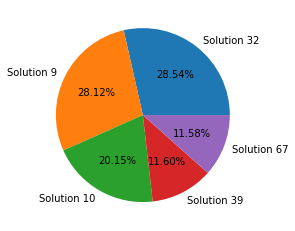

In [21]:
# Plotting pie chart for Solution_Type for top 5 values
plt.pie(Solution_Type[:5], labels= Solution_Type_index[:5], autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

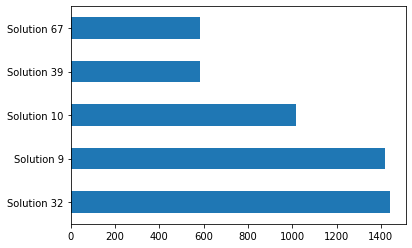

In [22]:
# Plotting bar chart for Solution_Type
Solution_Type[:5].plot(kind = 'barh')

In [23]:
# Sector
Sector = df['Sector'].value_counts()
Sector

Sector 23    2693
Sector 2     1748
Sector 20     773
Sector 12     607
Sector 24     578
Sector 17     474
Sector 16     474
Sector 15     387
Sector 9      369
Sector 25     273
Sector 18     251
Sector 1      231
Sector 13     185
Sector 22     144
Sector 19     142
Sector 3      135
Sector 4      128
Sector 11     114
Sector 14     109
Sector 6       96
Sector 5       64
Sector 8       39
Sector 21      30
Sector 7       14
Sector 10       3
Name: Sector, dtype: int64

In [24]:
Sector_index = df['Sector'].value_counts().index
Sector_index

Index(['Sector 23', 'Sector 2', 'Sector 20', 'Sector 12', 'Sector 24',
       'Sector 17', 'Sector 16', 'Sector 15', 'Sector 9', 'Sector 25',
       'Sector 18', 'Sector 1', 'Sector 13', 'Sector 22', 'Sector 19',
       'Sector 3', 'Sector 4', 'Sector 11', 'Sector 14', 'Sector 6',
       'Sector 5', 'Sector 8', 'Sector 21', 'Sector 7', 'Sector 10'],
      dtype='object')

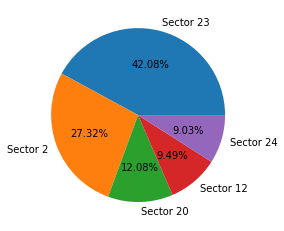

In [25]:
# Plotting pie chart for different Sector and checking the top 5 sector
plt.pie(Sector[:5], labels = Sector_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

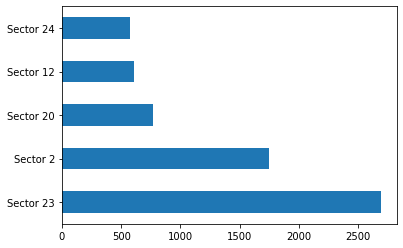

In [26]:
# Plot bar grapg for top 5 Sector
Sector[:5].plot(kind = 'barh')

In [27]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [28]:
# Location
Location = df['Location'].value_counts()
Location

L10       3360
L5        2328
L1        1572
Others     817
L3         556
L11        367
L12        276
L9         240
L7         238
L4         188
L6         100
L8          11
L2           8
Name: Location, dtype: int64

In [29]:
Location_index = df['Location'].value_counts().index
Location_index

Index(['L10', 'L5', 'L1', 'Others', 'L3', 'L11', 'L12', 'L9', 'L7', 'L4', 'L6',
       'L8', 'L2'],
      dtype='object')

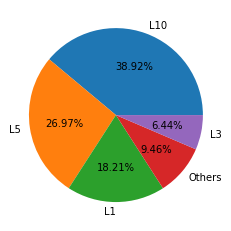

In [30]:
# Plot pie chart for top 5 Location
plt.pie(Location[:5], labels = Location_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

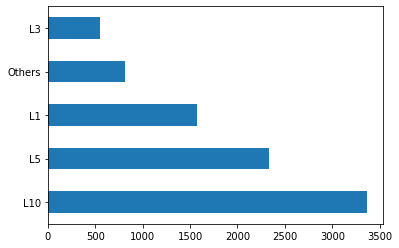

In [31]:
# Plot bar chart for top 5 Location
Location[:5].plot(kind = 'barh')

In [32]:
# VP Name
VP_Name = df['VP Name'].value_counts()
VP_Name

Mervin Harwood         1166
Ankita Aggarwal        1143
Sargar Deep Rao         956
Long Bergstrom          921
Mangesh K. Singh        812
Rosanna Maynez          662
Ekta Zutshi             550
Rahul Bajpai            523
neeraj kumar            471
Son Mcconnaughy         232
som dutt                220
Hardeep Suksma          208
Brendon Wycoff          189
Clinton Mani            184
Saurabh Singh           176
Jewell Tunstall         156
Rudraksh Sharma         147
Gopa Trilochana         136
Russell Dahlen          133
Molly Eakes             126
Alam Syed               126
Gaurav Sameria          114
Varsha Arora            104
Gayle Molter            104
Vidur Hukle             100
Earline Langton          82
Manpreet Singh           46
Mayank Mewar             41
Marcella Mo              32
Rahul Kocher             32
Man Suddeth              29
Jitendra Choudhary       28
Prashant Rawat           27
Lilli Storrs             26
Vikram Rawat             17
Kamelesh Srinivasan 

In [33]:
VP_Name_index = df['VP Name'].value_counts().index
VP_Name_index

Index(['Mervin Harwood', 'Ankita Aggarwal', 'Sargar Deep Rao',
       'Long Bergstrom', 'Mangesh K. Singh', 'Rosanna Maynez', 'Ekta Zutshi',
       'Rahul Bajpai', 'neeraj kumar', 'Son Mcconnaughy', 'som dutt',
       'Hardeep Suksma', 'Brendon Wycoff', 'Clinton Mani', 'Saurabh Singh',
       'Jewell Tunstall', 'Rudraksh Sharma', 'Gopa Trilochana',
       'Russell Dahlen', 'Molly Eakes', 'Alam Syed', 'Gaurav Sameria',
       'Varsha Arora', 'Gayle Molter', 'Vidur Hukle', 'Earline Langton',
       'Manpreet Singh', 'Mayank Mewar', 'Marcella Mo', 'Rahul Kocher',
       'Man Suddeth', 'Jitendra Choudhary', 'Prashant Rawat', 'Lilli Storrs',
       'Vikram Rawat', 'Kamelesh Srinivasan', 'Dennis Faux', 'Visvajeet Das',
       'Waylon Mulder', 'P. Somya', 'Kirk Hofmeister', 'Sarthak Batra',
       'md. afsar'],
      dtype='object')

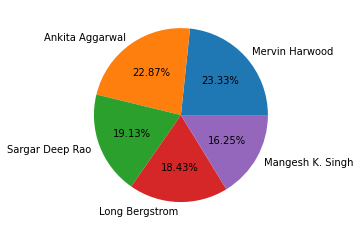

In [34]:
#. Check the top 5 VP_name using pie chart
plt.pie(VP_Name[:5], labels = VP_Name_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

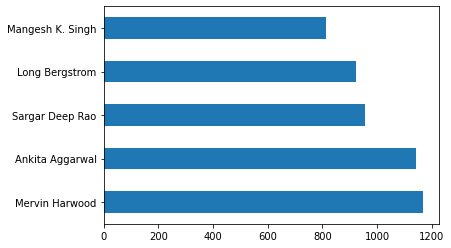

In [35]:
# Check the top 5 VP_name using bar chart
VP_Name[:5].plot(kind = 'barh')

In [36]:
# Manager Name
Manager_Name = df['Manager Name'].value_counts()
Manager_Name

Molly Eakes        323
Rudraksh Sharma    270
Desmond Krout      230
Gayle Molter       186
Manpreet Singh     181
                  ... 
Anju Nanda           1
Taran Singh          1
pooran chand         1
Rishab Bhatt         1
Cleotilde Biron      1
Name: Manager Name, Length: 278, dtype: int64

In [37]:
Manager_Name_index = df['Manager Name'].value_counts().index
Manager_Name_index

Index(['Molly Eakes', 'Rudraksh Sharma', 'Desmond Krout', 'Gayle Molter',
       'Manpreet Singh', 'Rosana Yokum', 'Rayford Durgan', 'Manish Saundriyal',
       'Jewell Tunstall', 'Hardeep Suksma',
       ...
       'Palmer Holmberg', 'Heath Mullarkey', 'Sultan Khan', 'Aastha Gandhi',
       'Anish Jonson', 'Anju Nanda', 'Taran Singh', 'pooran chand',
       'Rishab Bhatt', 'Cleotilde Biron'],
      dtype='object', length=278)

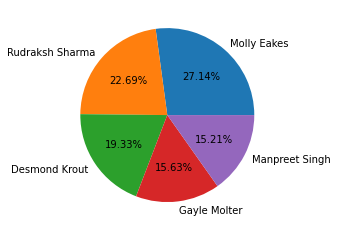

In [38]:
# Check the top 5 Manager_Name using pie chart
plt.pie(Manager_Name[:5], labels = Manager_Name_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

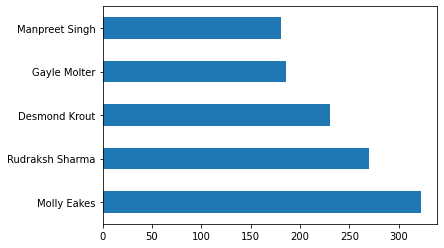

In [39]:
# Check top 5 Manager_Name using bar chart
Manager_Name[:5].plot(kind = 'barh')

In [40]:
# Deal Status Code
Deal_Status_Code = df['Deal Status Code'].value_counts()

In [41]:
Deal_Status_Code

# Observation: The dataset is a balanced dataset

Lost    6306
Won     3755
Name: Deal Status Code, dtype: int64

In [42]:
Deal_Status_Code_index = df['Deal Status Code'].value_counts().index
Deal_Status_Code_index

Index(['Lost', 'Won'], dtype='object')

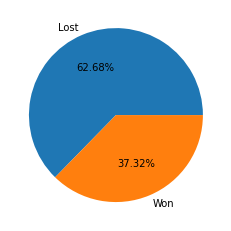

In [43]:
# Plot pie chart for the target variable Deal_Status_Code
plt.pie(Deal_Status_Code[:5], labels = Deal_Status_Code_index[:5], autopct = '%1.2f%%')
plt.show()

<AxesSubplot:>

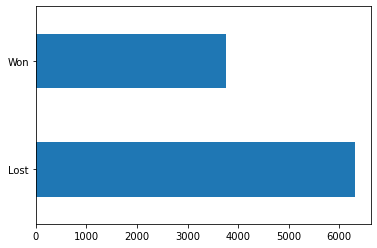

In [44]:
# Visualize Deal_Status_Code using bar chart
Deal_Status_Code[:5].plot(kind = 'barh')

## Checking the relation between different variables

In [45]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost


In [46]:
# Checking relation between the 'Client Category' and 'Deal Status Code'
rel_client_cat = df[['Client Category', 'Deal Status Code']].groupby(['Client Category',
                                'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [47]:
rel_client_cat

,Client Category,Deal Status Code,Deal Status Count
0,Airpline,Lost,22
1,Airpline,Won,5
2,Automobiles,Lost,112
3,Automobiles,Won,66
4,Consulting,Lost,182
...,...,...,...
77,Tech,Won,313
78,Telecom,Lost,192
79,Telecom,Won,135
80,e-commerce,Lost,20


In [48]:
# Checking relation between 'Solution Type' and 'Deal Status Code'
rel_Solution_Type = df[['Solution Type', 'Deal Status Code']].groupby(['Solution Type',
                                'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [49]:
rel_Solution_Type

,Solution Type,Deal Status Code,Deal Status Count
0,Solution 1,Lost,2
1,Solution 1,Won,3
2,Solution 10,Lost,690
3,Solution 10,Won,326
4,Solution 11,Lost,88
...,...,...,...
111,Solution 7,Won,62
112,Solution 8,Lost,190
113,Solution 8,Won,184
114,Solution 9,Lost,1018


In [50]:
# Checking relation between 'Sector' and 'Deal Status Code'
rel_Sector = df[['Sector', 'Deal Status Code']].groupby(['Sector',
                                'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [51]:
rel_Sector

,Sector,Deal Status Code,Deal Status Count
0,Sector 1,Lost,158
1,Sector 1,Won,73
2,Sector 10,Lost,2
3,Sector 10,Won,1
4,Sector 11,Lost,86
5,Sector 11,Won,28
6,Sector 12,Lost,406
7,Sector 12,Won,201
8,Sector 13,Lost,148
9,Sector 13,Won,37


In [52]:
# Checking relation between 'Location' and 'Deal Status Code'
rel_Location = df[['Location', 'Deal Status Code']].groupby(['Location',
                                'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [53]:
rel_Location

,Location,Deal Status Code,Deal Status Count
0,L1,Lost,912
1,L1,Won,660
2,L10,Lost,2230
3,L10,Won,1130
4,L11,Lost,232
5,L11,Won,135
6,L12,Lost,178
7,L12,Won,98
8,L2,Lost,6
9,L2,Won,2


In [54]:
# Checking relation between 'VP Name' and 'Deal Status Code'
rel_VP_Name = df[['VP Name', 'Deal Status Code']].groupby(['VP Name',
                                'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [55]:
rel_VP_Name

,VP Name,Deal Status Code,Deal Status Count
0,Alam Syed,Lost,62
1,Alam Syed,Won,64
2,Ankita Aggarwal,Lost,866
3,Ankita Aggarwal,Won,277
4,Brendon Wycoff,Lost,132
...,...,...,...
77,md. afsar,Lost,2
78,neeraj kumar,Lost,254
79,neeraj kumar,Won,217
80,som dutt,Lost,138


In [56]:
# Checking relation between 'Manager Name' and 'Deal Status Code'
rel_Manager_Name = df[['Manager Name', 'Deal Status Code']].groupby(['Manager Name',
                                'Deal Status Code']).size().reset_index().rename(columns={0:'Deal Status Count'})

In [57]:
rel_Manager_Name

,Manager Name,Deal Status Code,Deal Status Count
0,Aastha Gandhi,Won,1
1,Abhinav Warrier,Lost,80
2,Abhinav Warrier,Won,15
3,Abhishek Singhal,Lost,44
4,Abhishek Singhal,Won,23
...,...,...,...
470,sunder paal,Won,6
471,vansu dev,Lost,78
472,vansu dev,Won,54
473,vinit katariya,Lost,14


In [58]:
# On the basis of 'Deal Status Code' finding the 'Deal Cost' for all 'Client Category'
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Client Category', values = 'Deal Cost'))

Client Category        Airpline    Automobiles    Consulting  Consumer Good  \
Deal Status Code                                                              
Lost              482887.701818  706355.042679  6.088462e+05  629885.954898   
Won               549411.768000  537281.641061  1.528884e+06  859452.332644   

Client Category   Domestic Bank  Domestic Private Bank  Domestic Public Bank  \
Deal Status Code                                                               
Lost               1.495498e+06          881407.086023          1.070093e+06   
Won                1.919716e+06          688611.491860          5.993003e+05   

Client Category     Electronics        Energy        Energy   ...  \
Deal Status Code                                              ...   
Lost              553812.637407  1.557206e+06  694726.890714  ...   
Won               596633.987407  6.761059e+05  926633.987778  ...   

Client Category      Power ind    Real Estate  Research Development  \
Deal Status Co

In [59]:
# On the basis of 'Deal Status Code' finding the 'Deal Cost' for all 'Client Category'
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Solution Type', values = 'Deal Cost'))

Solution Type     Solution 1    Solution 10   Solution 11    Solution 12  \
Deal Status Code                                                           
Lost               224117.65  676461.210986  1.543663e+06  825068.800058   
Won                150196.08  594538.975828  3.059717e+06  897737.095714   

Solution Type       Solution 13   Solution 14    Solution 15    Solution 16  \
Deal Status Code                                                              
Lost              826709.730748  1.018263e+06  889215.686667  608529.412222   
Won               702220.889286  5.171639e+05  347794.115000  650735.295000   

Solution Type      Solution 17  Solution 18  ...   Solution 61  Solution 62  \
Deal Status Code                             ...                              
Lost              1.029412e+06          NaN  ...  2.458824e+06  2794117.650   
Won               6.669118e+05     225000.0  ...  1.279816e+06  3708970.585   

Solution Type     Solution 63  Solution 64  Solution 65  Solu

In [60]:
# On the basis of 'Deal Status Code' finding the 'Deal Cost' for all 'Client Category'
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Sector', values = 'Deal Cost'))

Sector                 Sector 1  Sector 10      Sector 11      Sector 12  \
Deal Status Code                                                           
Lost              613037.974810   29411.77  739172.366977  535514.343744   
Won               524375.504795  311176.47  388245.799286  739632.719204   

Sector               Sector 13      Sector 14      Sector 15     Sector 16  \
Deal Status Code                                                             
Lost              1.421940e+06  362345.768049  813788.336154  1.255285e+06   
Won               6.606916e+05  544716.777037  438658.208824  6.957036e+05   

Sector               Sector 17      Sector 18  ...      Sector 23  \
Deal Status Code                               ...                  
Lost              7.797553e+05  832332.421860  ...  558666.786695   
Won               1.027609e+06  775491.437342  ...  669064.577854   

Sector               Sector 24      Sector 25       Sector 3       Sector 4  \
Deal Status Code          

In [61]:
# On the basis of 'Deal Status Code' finding the 'Deal Cost' for all 'Client Category'
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Location', values = 'Deal Cost'))

Location                     L1            L10            L11           L12  \
Deal Status Code                                                              
Lost              568322.368838  838808.757964  394284.990431  1.152743e+06   
Won               788830.659970  784242.842699  541379.085778  6.652551e+05   

Location                    L2             L3             L4             L5  \
Deal Status Code                                                              
Lost              1.205882e+06  482105.089944  586475.257143  793381.085661   
Won               7.132353e+05  384011.765300  416465.845161  784038.147735   

Location                     L6             L7           L8             L9  \
Deal Status Code                                                             
Lost              686176.471429  538164.300575  1461764.704  592328.684845   
Won               316196.079000  466530.331250    73529.410  348299.234130   

Location                Others  
Deal Status Code    

In [62]:
# On the basis of 'Deal Status Code' finding the 'Deal Cost' for all 'Client Category'
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'VP Name', values = 'Deal Cost'))

VP Name              Alam Syed  Ankita Aggarwal  Brendon Wycoff  \
Deal Status Code                                                  
Lost              1.087144e+06     654206.63000    1.096894e+06   
Won               1.172937e+06     503528.35065    1.909288e+06   

VP Name            Clinton Mani    Dennis Faux  Earline Langton   Ekta Zutshi  \
Deal Status Code                                                                
Lost              776755.218548  554656.861667     1.189219e+06  7.912821e+05   
Won               600857.843500  315294.120000     6.034314e+05  1.021396e+06   

VP Name           Gaurav Sameria  Gayle Molter  Gopa Trilochana  ...  \
Deal Status Code                                                 ...   
Lost               554590.017879  7.291971e+05     1.464321e+06  ...   
Won                586433.823958  1.282863e+06     8.195701e+05  ...   

VP Name           Saurabh Singh  Son Mcconnaughy  Varsha Arora    Vidur Hukle  \
Deal Status Code                    

In [63]:
# On the basis of 'Deal Status Code' finding the 'Deal Cost' for all 'Client Category'
print(pd.pivot_table(df, index = 'Deal Status Code', columns = 'Manager Name', values = 'Deal Cost'))

Manager Name      Aastha Gandhi  Abhinav Warrier  Abhishek Singhal  \
Deal Status Code                                                     
Lost                        NaN    588808.824000     772860.963182   
Won                   242647.06    302235.296667     476956.522609   

Manager Name      Abhiskek Kumar   Abhiskhek  D    Abram Fines  Aditya Kumar  \
Deal Status Code                                                               
Lost               949894.957857  440767.973889  501764.706000     792647.06   
Won                587507.740789  375658.823600  714127.789655     250367.65   

Manager Name      Aditya Tondon   Ahdarsha Jha  Ahswini Saini  ...  \
Deal Status Code                                               ...   
Lost                 1058823.53  924866.311818     1029411.77  ...   
Won                         NaN  351102.940000      601470.59  ...   

Manager Name          shafibul  sharat chandran   sheak shakir  shiv kumar  \
Deal Status Code                       

## Checking Date column

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10061 non-null  object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [65]:
# From the  'Deal Date' column extracting only the year 
df['Deal_Date_year'] = df['Deal Date'].dt.year

In [66]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011


<AxesSubplot:xlabel='Deal_Date_year', ylabel='Count'>

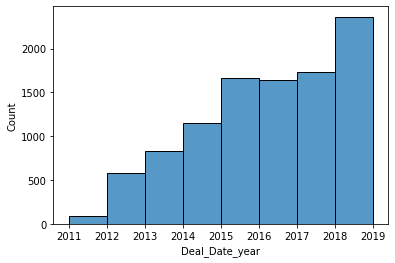

In [67]:
sns.histplot(df.Deal_Date_year, bins = 8)

# Observation: Maximum transactions happened in year 2019 and minimum in 2011

In [68]:
# From the  'Deal Date' column extracting only the month
df['Deal_Date_month'] = df['Deal Date'].dt.month

In [69]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6


<AxesSubplot:xlabel='Deal_Date_month', ylabel='Count'>

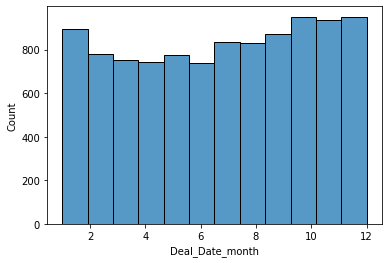

In [70]:
sns.histplot(df.Deal_Date_month, bins = 12)

# Observation: More transactions happened between the month of October - January

In [71]:
# From the  'Deal Date' column extracting only the data by quarter
df['Deal_Date_quarter'] = df['Deal Date'].dt.quarter

In [72]:
df.head()

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


<AxesSubplot:xlabel='Deal_Date_quarter', ylabel='Count'>

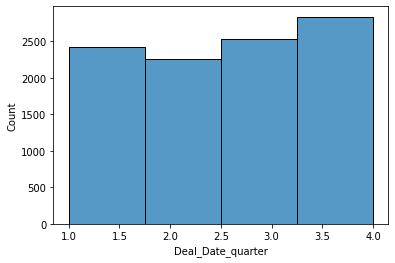

In [73]:
sns.histplot(df.Deal_Date_quarter, bins = 4)

# Observation: Maximum transactions happened in the 4th quarter

In [74]:
# Drop the Deal Date column
df = df.drop(['Deal Date'], axis = 1)
df

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,Telecom,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,Internal,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,Internal,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2
...,...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,2019,3,1
10057,Internal,Solution 6,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won,2019,3,1
10058,Power ind,Solution 9,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,2019,2,1
10059,Power ind,Solution 62,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won,2019,1,1


## Feature Encoding

In [75]:
# Client Category

df['Client Category'] = df['Client Category'].astype('category')
df['Client Category'] = df['Client Category'].cat.codes

In [76]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,2012,3,1
1,39,Solution 7,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,2012,9,3
2,19,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,8,3
3,19,Solution 59,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,2011,4,2
4,19,Solution 32,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,2011,6,2


In [77]:
# Solution Type

df['Solution Type'] = df['Solution Type'].astype('category')
df['Solution Type'] = df['Solution Type'].cat.codes

In [78]:
# Sector

df['Sector'] = df['Sector'].astype('category')
df['Sector'] = df['Sector'].cat.codes

In [79]:
#Location

df['Location'] = df['Location'].astype('category')
df['Location'] = df['Location'].cat.codes

In [80]:
# VP Name

df['VP Name'] = df['VP Name'].astype('category')
df['VP Name'] = df['VP Name'].cat.codes

In [81]:
# Manager Name

df['Manager Name'] = df['Manager Name'].astype('category')
df['Manager Name'] = df['Manager Name'].cat.codes

In [82]:
# Deal Status Code

df['Deal Status Code'] = df['Deal Status Code'].astype('category')
df['Deal Status Code'] = df['Deal Status Code'].cat.codes

In [83]:
df.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,1,2012,3,1
1,39,64,16,7,6,82,744705.88,1,2012,9,3
2,19,54,12,12,6,183,60000.00,0,2011,8,3
3,19,54,12,12,6,183,60000.00,0,2011,4,2
4,19,25,12,12,6,183,80882.35,0,2011,6,2


## Splitting the data into Independent and Dependent variables

In [84]:
x = df.drop(['Deal Status Code'], axis = 1)
y = df['Deal Status Code']

In [85]:
x.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost,Deal_Date_year,Deal_Date_month,Deal_Date_quarter
0,39,64,16,7,6,82,150000.00,2012,3,1
1,39,64,16,7,6,82,744705.88,2012,9,3
2,19,54,12,12,6,183,60000.00,2011,8,3
3,19,54,12,12,6,183,60000.00,2011,4,2
4,19,25,12,12,6,183,80882.35,2011,6,2


In [86]:
x = x.iloc[:, 0:7]
x.head()

,Client Category,Solution Type,Sector,Location,VP Name,Manager Name,Deal Cost
0,39,64,16,7,6,82,150000.00
1,39,64,16,7,6,82,744705.88
2,19,54,12,12,6,183,60000.00
3,19,54,12,12,6,183,60000.00
4,19,25,12,12,6,183,80882.35


In [87]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Deal Status Code, dtype: int8

## Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x1 = sc.fit_transform(x)

In [89]:
x1

array([[ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.38084443],
       [ 1.40299487,  1.29765094,  0.78535088, ..., -1.11119992,
        -0.71544412, -0.01369972],
       [-0.33339304,  0.86106354,  0.01663725, ..., -1.11119992,
         0.60004268, -0.43640639],
       ...,
       [ 0.70843971,  1.38496843,  2.32277814, ...,  0.79154462,
         0.58701806, -0.11029764],
       [ 0.70843971,  1.0356985 ,  2.32277814, ..., -0.03573561,
        -1.13223202,  1.40458284],
       [ 0.44798152,  1.38496843, -1.71296842, ...,  1.20518474,
         1.0298552 , -0.38266018]])

## Train Test Split

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 101)

print('x train : ', x_train.shape)
print('x test : ', x_test.shape)
print('y train : ', y_train.shape)
print('y test : ', y_test.shape)

x train :  (8048, 7)
x test :  (2013, 7)
y train :  (8048,)
y test :  (2013,)


## Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [92]:
y_pred_test = logit.predict(x_test)
y_pred_train = logit.predict(x_train)

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_train,y_pred_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_test))

[[4992    6]
 [3047    3]]
########################################
[[1308    0]
 [ 705    0]]


In [94]:
print(classification_report(y_train,y_pred_train))
print("##"*30)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77      4998
           1       0.33      0.00      0.00      3050

    accuracy                           0.62      8048
   macro avg       0.48      0.50      0.38      8048
weighted avg       0.51      0.62      0.48      8048

############################################################
              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1308
           1       0.00      0.00      0.00       705

    accuracy                           0.65      2013
   macro avg       0.32      0.50      0.39      2013
weighted avg       0.42      0.65      0.51      2013



In [95]:
print(accuracy_score(y_train,y_pred_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_test))

0.6206510934393639
####################
0.6497764530551415


## Cross Validation(K Fold Method)


In [96]:
from sklearn.model_selection import cross_val_score

accuracy_train = cross_val_score(logit, x_train, y_train, cv = 10)
accuracy_test = cross_val_score(logit, x_test, y_test, cv = 10)
print(accuracy_train)
print('##'*20)
print(accuracy_test)


[0.61987578 0.61987578 0.62236025 0.62111801 0.61987578 0.62111801
 0.62236025 0.62111801 0.62064677 0.61940299]
########################################
[0.64851485 0.64851485 0.64851485 0.65174129 0.65174129 0.65174129
 0.65174129 0.65174129 0.64676617 0.64676617]


In [97]:
# Training accuracy:0.6206510934393639
# Test accuracy:0.6497764530551415

In [98]:
# We will use XGBoost model as Logistic Regression model is giving high bias

## XGBoost Model

In [99]:
from xgboost import XGBClassifier

xgb_class = XGBClassifier()
xgb_class.fit(x_train, y_train)

[12:18:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_pred_xgb_train = xgb_class.predict(x_train)
y_pred_xgb_test = xgb_class.predict(x_test)

In [101]:
print(confusion_matrix(y_train,y_pred_xgb_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_xgb_test))

[[4821  177]
 [ 408 2642]]
########################################
[[1157  151]
 [ 266  439]]


In [102]:
print(classification_report(y_train,y_pred_xgb_train))
print("##"*30)
print(classification_report(y_test,y_pred_xgb_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4998
           1       0.94      0.87      0.90      3050

    accuracy                           0.93      8048
   macro avg       0.93      0.92      0.92      8048
weighted avg       0.93      0.93      0.93      8048

############################################################
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1308
           1       0.74      0.62      0.68       705

    accuracy                           0.79      2013
   macro avg       0.78      0.75      0.76      2013
weighted avg       0.79      0.79      0.79      2013



In [103]:
print(accuracy_score(y_train,y_pred_xgb_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_xgb_test))

0.9273111332007953
####################
0.7928464977645305


## Hyper-parameter tuning for XgBoost

In [104]:
from sklearn.model_selection import RandomizedSearchCV

In [105]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#Subssample parameter values
subsample=[0.7,0.6,0.8]

# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]


In [106]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [107]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = xgb_class, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)


In [108]:
xg_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[12:22:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           tree_method='exact',
                                           validate_parameters=1,
       

In [109]:
print(xg_random.best_params_)

{'subsample': 0.8, 'n_estimators': 1100, 'min_child_weight': 3, 'max_depth': 30, 'learning_rate': '0.2'}


In [110]:
y_pred_xg_random_train = xg_random.predict(x_train)
y_pred_xg_random_test = xg_random.predict(x_test)

In [111]:
print(accuracy_score(y_train,y_pred_xg_random_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_xg_random_test))

0.9965208747514911
####################
0.8460009935419771


In [112]:
# Train accuracy - 0.9965208747514911
# Test accuracy - 0.8460009935419771

## Random Forest model

In [113]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [114]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [115]:
print(confusion_matrix(y_train,y_pred_rf_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_rf_test))

[[4994    4]
 [  23 3027]]
########################################
[[1256   52]
 [ 270  435]]


In [116]:
print(classification_report(y_train,y_pred_rf_train))
print("##"*30)
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4998
           1       1.00      0.99      1.00      3050

    accuracy                           1.00      8048
   macro avg       1.00      1.00      1.00      8048
weighted avg       1.00      1.00      1.00      8048

############################################################
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1308
           1       0.89      0.62      0.73       705

    accuracy                           0.84      2013
   macro avg       0.86      0.79      0.81      2013
weighted avg       0.85      0.84      0.83      2013



In [117]:
print(accuracy_score(y_train,y_pred_rf_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_rf_test))

0.9966451292246521
####################
0.8400397416790859


## Cross Validation(k fold method)

In [118]:
from sklearn.model_selection import cross_val_score

accuracy_test = cross_val_score(rf, x_test, y_test, cv = 10)
print(accuracy_test)


[0.66831683 0.6980198  0.68316832 0.69154229 0.70149254 0.73134328
 0.77114428 0.72636816 0.70149254 0.74626866]


In [119]:
# Training accuracy:0.9966451292246521
# Test accuracy:0.8400397416790859

## K Nearest Neighbor(KNN) Model

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [122]:
y_pred_knn_train = knn.predict(x_train)
y_pred_knn_test = knn.predict(x_test)

In [123]:
print(confusion_matrix(y_train,y_pred_knn_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_knn_test))

[[4300  698]
 [1050 2000]]
########################################
[[1014  294]
 [ 353  352]]


In [124]:
print(classification_report(y_train,y_pred_knn_train))
print("##"*30)
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      4998
           1       0.74      0.66      0.70      3050

    accuracy                           0.78      8048
   macro avg       0.77      0.76      0.76      8048
weighted avg       0.78      0.78      0.78      8048

############################################################
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1308
           1       0.54      0.50      0.52       705

    accuracy                           0.68      2013
   macro avg       0.64      0.64      0.64      2013
weighted avg       0.67      0.68      0.68      2013



In [125]:
print(accuracy_score(y_train,y_pred_knn_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_knn_test))

0.782803180914513
####################
0.678589170392449


## Cross validation(k Fold Method)

In [126]:
from sklearn.model_selection import cross_val_score

accuracy_test = cross_val_score(knn, x_test, y_test, cv = 20)
print(accuracy_test)



[0.62376238 0.66336634 0.6039604  0.59405941 0.67326733 0.6039604
 0.7029703  0.69306931 0.68316832 0.6039604  0.59405941 0.64356436
 0.69306931 0.63       0.63       0.62       0.55       0.63
 0.66       0.63      ]


In [127]:
print(accuracy_test[7])

0.693069306930693


In [128]:
# Training accuracy:0.782803180914513
# Test accuracy:0.693069306930693

## Support Vector Machine(SVM) Model

In [129]:
from sklearn.svm import SVC

In [130]:
svm_model2 = SVC()
svm_model2.fit(x_train, y_train)

SVC()

In [131]:
y_pred_svm_train = svm_model2.predict(x_train)
y_pred_svm_test = svm_model2.predict(x_test)

In [132]:
print(accuracy_score(y_train,y_pred_svm_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_svm_test))

0.658051689860835
####################
0.6661698956780924


In [133]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [134]:
y_pred_linear_train = svm_model.predict(x_train)
y_pred_linear_test = svm_model.predict(x_test)

In [135]:
print(accuracy_score(y_train,y_pred_linear_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_linear_test))

0.6210238568588469
####################
0.6497764530551415


In [136]:
svm_model1 = SVC(kernel='poly')
svm_model1.fit(x_train, y_train)

SVC(kernel='poly')

In [137]:
y_pred_poly_train = svm_model1.predict(x_train)
y_pred_poly_test = svm_model1.predict(x_test)

In [138]:
print(accuracy_score(y_train,y_pred_poly_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_poly_test))

0.6222664015904572
####################
0.6502732240437158


In [139]:
svm_model3 = SVC(kernel='sigmoid')
svm_model3.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [140]:
y_pred_sigmoid_train = svm_model3.predict(x_train)
y_pred_sigmoid_test = svm_model3.predict(x_test)

In [141]:
print(accuracy_score(y_train,y_pred_sigmoid_train))
print("##"*10)
print(accuracy_score(y_test,y_pred_sigmoid_test))

0.5202534791252486
####################
0.5459513164431197


In [142]:
# Best training accuracy:0.658051689860835
# Best test accuracy:0.6661698956780924

## Bagging Model

In [143]:
from sklearn.ensemble import BaggingClassifier

In [144]:
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [145]:
y_pred_bagging_train = bagging.predict(x_train)
y_pred_bagging_test = bagging.predict(x_test)

In [146]:
print(confusion_matrix(y_train,y_pred_bagging_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_bagging_test))

[[4988   10]
 [ 109 2941]]
########################################
[[1236   72]
 [ 286  419]]


In [147]:
print(classification_report(y_train,y_pred_bagging_train))
print("##"*30)
print(classification_report(y_test,y_pred_bagging_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4998
           1       1.00      0.96      0.98      3050

    accuracy                           0.99      8048
   macro avg       0.99      0.98      0.98      8048
weighted avg       0.99      0.99      0.99      8048

############################################################
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1308
           1       0.85      0.59      0.70       705

    accuracy                           0.82      2013
   macro avg       0.83      0.77      0.79      2013
weighted avg       0.83      0.82      0.81      2013



In [148]:
print(accuracy_score(y_train,y_pred_bagging_train))
print('##'*10)
print(accuracy_score(y_test, y_pred_bagging_test))

0.985213717693837
####################
0.8221559860904123


## Cross Validation(k fold Method)

In [149]:
from sklearn.model_selection import cross_val_score

accuracy_test = cross_val_score(bagging, x_test, y_test, cv = 20)
print(accuracy_test)


[0.76237624 0.62376238 0.68316832 0.73267327 0.68316832 0.66336634
 0.7029703  0.72277228 0.7029703  0.66336634 0.74257426 0.72277228
 0.71287129 0.73       0.74       0.77       0.65       0.71
 0.67       0.78      ]


In [150]:
# Training accuracy:0.9803677932405567
# Test accuracy:0.812220566318927

## AdaBoost Model

In [151]:
from sklearn.ensemble import AdaBoostClassifier

In [152]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

AdaBoostClassifier()

In [153]:
y_pred_ada_train = ada.predict(x_train)
y_pred_ada_test = ada.predict(x_test)

In [154]:
print(confusion_matrix(y_train,y_pred_ada_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_ada_test))

[[4346  652]
 [1826 1224]]
########################################
[[1124  184]
 [ 441  264]]


In [155]:
print(classification_report(y_train,y_pred_ada_train))
print("##"*30)
print(classification_report(y_test,y_pred_ada_test))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      4998
           1       0.65      0.40      0.50      3050

    accuracy                           0.69      8048
   macro avg       0.68      0.64      0.64      8048
weighted avg       0.68      0.69      0.67      8048

############################################################
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1308
           1       0.59      0.37      0.46       705

    accuracy                           0.69      2013
   macro avg       0.65      0.62      0.62      2013
weighted avg       0.67      0.69      0.67      2013



In [156]:
print(accuracy_score(y_train,y_pred_ada_train))
print('##'*10)
print(accuracy_score(y_test, y_pred_ada_test))

0.6920974155069582
####################
0.6895181321410829


## Cross Validation(k fold Method)

In [157]:
from sklearn.model_selection import cross_val_score

accuracy_train = cross_val_score(ada, x_train, y_train, cv = 15)
accuracy_test = cross_val_score(ada, x_test, y_test, cv = 15)
print(accuracy_train)
print('##'*20)
print(accuracy_test)


[0.67597765 0.72998138 0.67225326 0.66108007 0.70949721 0.68715084
 0.66666667 0.68715084 0.69962687 0.67910448 0.67350746 0.68470149
 0.67723881 0.67910448 0.68470149]
########################################
[0.76296296 0.66666667 0.71851852 0.73880597 0.71641791 0.7238806
 0.70895522 0.6641791  0.70895522 0.75373134 0.6641791  0.67910448
 0.64925373 0.70149254 0.70895522]


In [158]:
print(accuracy_train[1])
print(accuracy_test[0])

0.7299813780260708
0.762962962962963


In [159]:
# Training accuracy:0.7299813780260708
# Test accuracy:0.762962962962963

## Gradient Boosting Model

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

In [161]:
gdb = GradientBoostingClassifier()
gdb.fit(x_train, y_train)

GradientBoostingClassifier()

In [162]:
y_pred_gdb_train = gdb.predict(x_train)
y_pred_gdb_test = gdb.predict(x_test)

In [163]:
print(confusion_matrix(y_train,y_pred_gdb_train))
print("##"*20)
print(confusion_matrix(y_test,y_pred_gdb_test))

[[4512  486]
 [1737 1313]]
########################################
[[1162  146]
 [ 424  281]]


In [164]:
print(classification_report(y_train,y_pred_gdb_train))
print("##"*30)
print(classification_report(y_test,y_pred_gdb_test))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      4998
           1       0.73      0.43      0.54      3050

    accuracy                           0.72      8048
   macro avg       0.73      0.67      0.67      8048
weighted avg       0.72      0.72      0.70      8048

############################################################
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1308
           1       0.66      0.40      0.50       705

    accuracy                           0.72      2013
   macro avg       0.70      0.64      0.65      2013
weighted avg       0.71      0.72      0.70      2013



In [165]:
print(accuracy_score(y_train, y_pred_gdb_train))
print('##'*10)
print(accuracy_score(y_test, y_pred_gdb_test))

0.7237823061630219
####################
0.7168405365126677


In [166]:
# Training accuracy:0.7237823061630219
# Test accuracy:0.7168405365126677

[12:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  37.3s
[12:18:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  36.3s
[12:19:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learnin

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option u

[12:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  37.0s
[12:18:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  36.7s
[12:19:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learnin

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option u

[12:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 1.4min
[12:19:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=7, n_estimators=300, subsample=0.6; total time=  15.0s
[12:19:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learn

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option u

[12:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 1.4min
[12:19:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=7, n_estimators=300, subsample=0.6; total time=  15.1s
[12:19:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learn

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option u

[12:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.05, max_depth=25, min_child_weight=6, n_estimators=1100, subsample=0.8; total time= 1.4min
[12:19:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=7, n_estimators=300, subsample=0.6; total time=  15.1s
[12:19:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learn

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option u

[12:18:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=900, subsample=0.8; total time=  37.5s
[12:18:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=300, subsample=0.7; total time=  18.2s
[12:19:12] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learnin

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option u

## Conclusion:

XGBoost Model performs best on the given dataset